# Práctica 12: Descomposición temporal y grafos
- Martínez Ostoa Néstor Iván
- Visualización de la Información
- LCD, IIMAS, UNAM

## Descomposición temporal

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL, seasonal_decompose
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [5]:
plt.rc('figure',figsize=(10,9))
plt.rc('font',size=13)

In [6]:
ozone_df = pd.read_csv('Ozono.csv')
ozone = ozone_df['Ozon concentration'].to_numpy()
ozone = pd.Series(ozone, index=pd.date_range('1-1-1959', periods=len(ozone), freq='M'), name = 'Ozone O3')
ozone.describe()

count    216.000000
mean       3.772685
std        1.491634
min        1.200000
25%        2.575000
50%        3.700000
75%        4.800000
max        8.700000
Name: Ozone O3, dtype: float64

In [7]:
stl = STL(ozone, seasonal=19)
res = stl.fit()
observed = res.observed.reset_index().rename(columns={'index':'time'})
trend = res.trend.reset_index().rename(columns={'index':'time'})
season = res.seasonal.reset_index().rename(columns={'index':'time'})
residual = res.resid.reset_index().rename(columns={'index':'time'})

In [8]:
fig = make_subplots(rows=4, cols=1)

fig.add_trace(
    go.Scatter(
        x=observed['time'], y=observed['Ozone O3'], name="Ozone O3",line_shape='linear'
    ), row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=trend['time'], y=trend['trend'], name="Trend",line_shape='linear'
    ), row=2, col=1
)

fig.add_trace(
    go.Scatter(
        x=season['time'], y=season['season'], name="Season",line_shape='linear'
    ), row=3, col=1
)

fig.add_trace(
    go.Scatter(
        x=residual['time'], y=residual['resid'], name="Noise",line_shape='linear'
    ), row=4, col=1
)

fig.update_layout(height=800, width=1100, title_text="Ozone O3 Seasonal Decomposition")
fig.show()

## Grafos

In [271]:
import networkx as nx
from pyvis.network import Network
from colour import Color

In [282]:
got_df = pd.read_csv('GOT_graph.csv')
print(got_df.shape)
got_df.head()

(352, 3)


,Source,Target,Weight
0,Aemon,Grenn,5
1,Aemon,Samwell,31
2,Aerys,Jaime,18
3,Aerys,Robert,6
4,Aerys,Tyrion,5


In [283]:
print(got_df['Source'].unique())

['Aemon' 'Aerys' 'Alliser' 'Amory' 'Arya' 'Balon' 'Belwas' 'Beric' 'Bran'
 'Brienne' 'Bronn' 'Brynden' 'Catelyn' 'Cersei' 'Craster' 'Daario'
 'Daenerys' 'Davos' 'Eddard' 'Eddison' 'Edmure' 'Gendry' 'Gilly' 'Gregor'
 'Hodor' 'Hoster' 'Irri' 'Jaime' 'Janos' 'Joffrey' 'Jojen' 'Jon'
 'Jon Arryn' 'Jorah' 'Kevan' 'Loras' 'Lothar' 'Luwin' 'Lysa' 'Mance'
 'Meera' 'Melisandre' 'Meryn' 'Missandei' 'Myrcella' 'Oberyn' 'Podrick'
 'Rattleshirt' 'Renly' 'Rhaegar' 'Rickard' 'Rickon' 'Robb' 'Robert'
 'Robert Arryn' 'Roose' 'Samwell' 'Sandor' 'Sansa' 'Shae' 'Shireen'
 'Stannis' 'Tommen' 'Tyrion' 'Tywin' 'Val' 'Varys' 'Viserys' 'Walder'
 'Walton' 'Ygritte']


In [284]:
got_df = got_df[got_df['Source'].isin(['Jon'])]

In [326]:
G = nx.from_pandas_edgelist(
    got_df, source='Source', target='Target',
    edge_attr='Weight'
)

### NetworkX

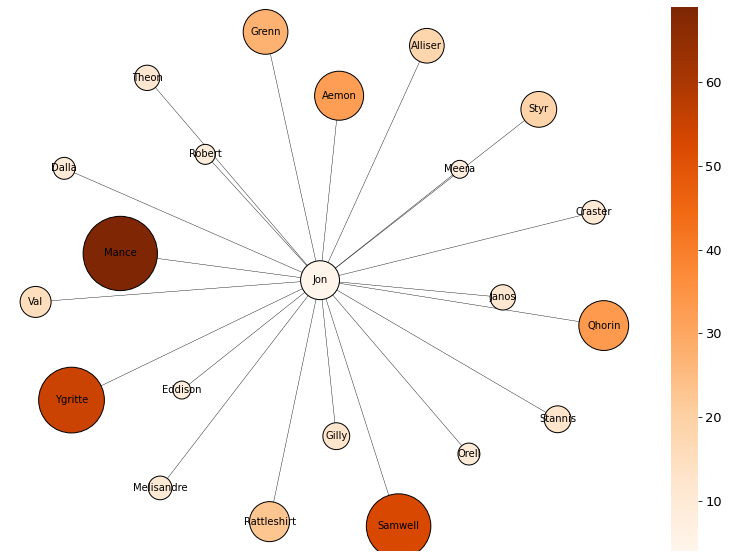

In [327]:
plt.figure(figsize=(14,10))
base_size = 80
node_sizes = [np.mean(got_df["Weight"])*base_size] + list(got_df["Weight"].apply(lambda x: x*base_size).to_numpy())
cmap = plt.cm.Oranges
nx.draw_networkx(
    G, pos = nx.spring_layout(G), 
    node_size = node_sizes, node_color=[0] + node_sizes[1:],
    edge_color="#000", font_size=10, 
    font_color='#000', cmap=cmap,
    width=0.4, edgecolors='black'
)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = min(got_df['Weight']), vmax=max(got_df['Weight'])))
sm._A = []
colorbar = plt.colorbar(sm)
colorbar.outline.set_visible(False)
plt.axis('off')
plt.show()

### Pyvis

In [359]:
got_net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
got_data = pd.read_csv('GOT_graph.csv')
sources = got_data['Source']
targets = got_data['Target']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    got_net.add_node(src, src, title=src, color='#e63946')
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

got_net.show('gameofthrones.html')

In [362]:
got_net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
got_net.force_atlas_2based()
got_data = pd.read_csv('GOT_graph.csv')
sources = got_data['Source']
targets = got_data['Target']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    got_net.add_node(src, src, title=src, color='#e63946')
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

got_net.show('gameofthrones_forced2atlas.html')

In [361]:
got_net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
got_net.barnes_hut(
    gravity=-8000,
    central_gravity=0.03,
    spring_length=100,
    spring_strength=0.001,
    damping=0.09,
    overlap=1
)
got_data = pd.read_csv('GOT_graph.csv')
sources = got_data['Source']
targets = got_data['Target']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    got_net.add_node(src, src, title=src, color='#e63946')
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

got_net.show('gameofthrones_barnes_hut.html')